In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

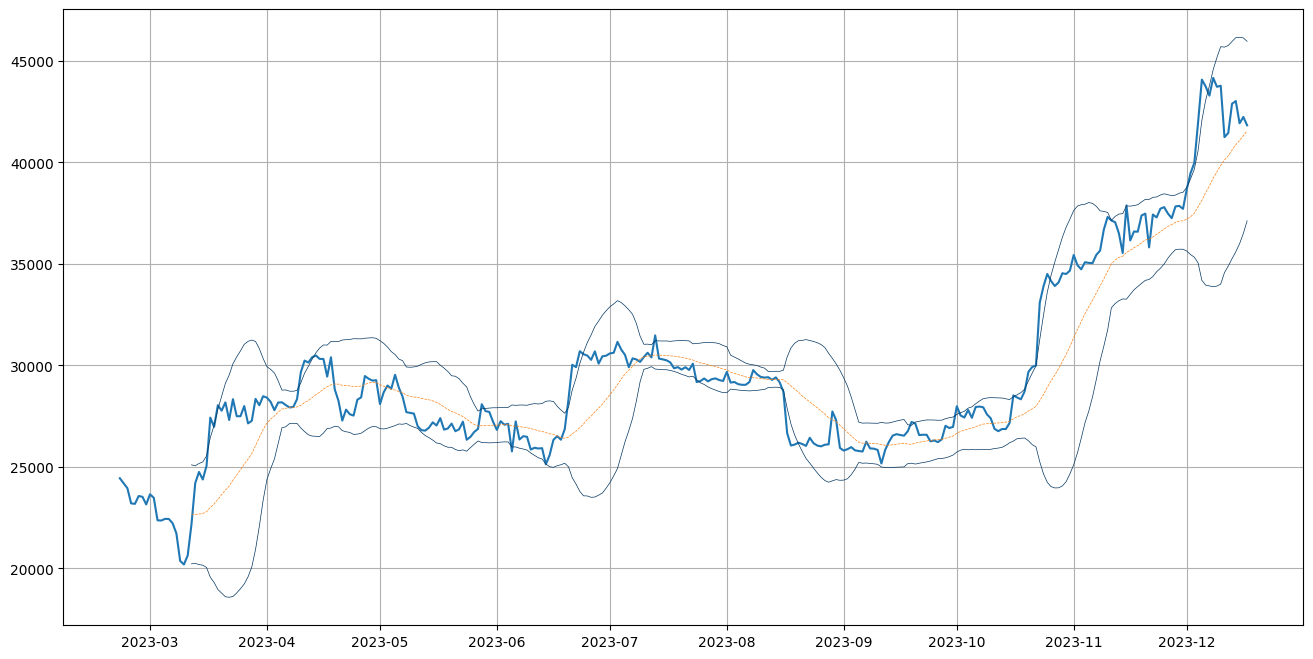

In [4]:
from algo_trader.lib.indicators.bbands import BBANDS

df = data.iloc[-300:]
bbands = BBANDS(20,2)
bbands.calculate(df)
bbands.plot()

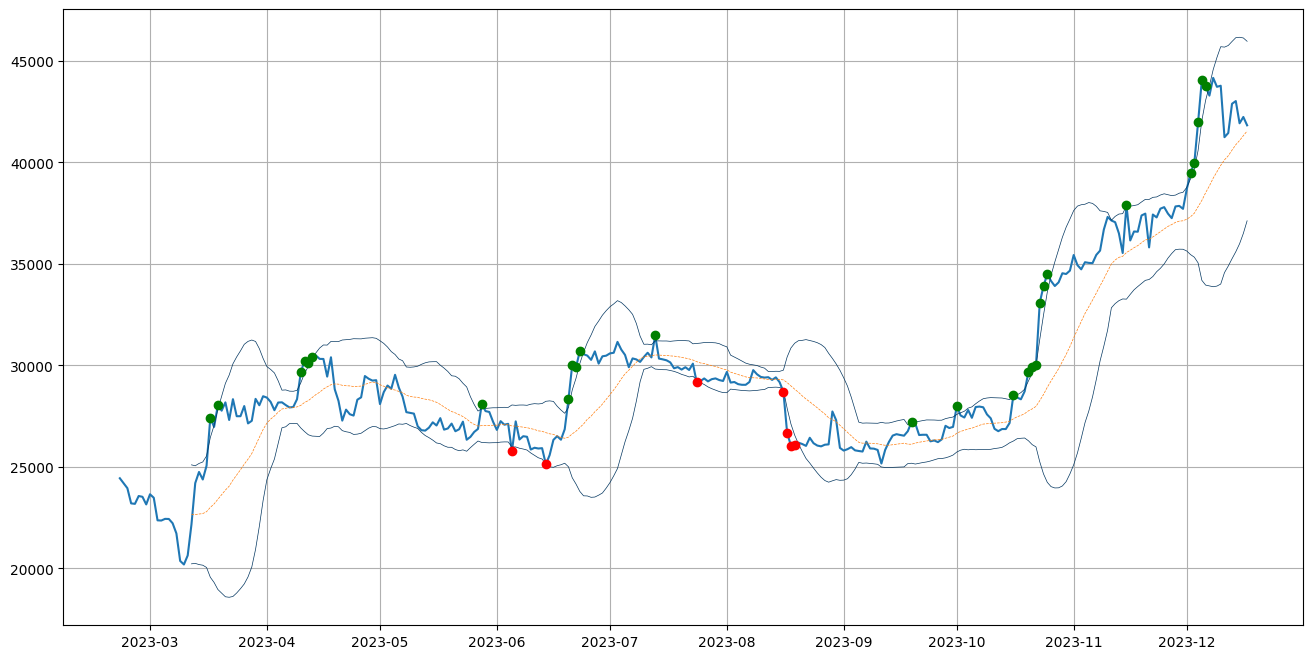

In [5]:
import matplotlib.pyplot as plt

new_df = bbands.calculate(df)
new_df['buy_signal'] = bbands.calc_buy_signals()
new_df['sell_signal'] = bbands.calc_sell_signals()
buySignals = new_df[new_df['buy_signal'] == 1]
sellSignals = new_df[new_df['sell_signal'] == 1]

fig = plt.figure()
fig.set_size_inches(16, 8)
plt.plot(new_df.index, new_df.Close)
plt.plot(new_df.index, new_df.LowerBand, linewidth = 0.5, color = "#033660")
plt.plot(new_df.index, new_df.UpperBand, linewidth = 0.5, color = "#033660")
plt.plot(new_df.index, new_df.MidBand, linewidth = 0.5, linestyle = "dashed")
plt.plot(buySignals.index, buySignals.Close, 'o', color='red')
plt.plot(sellSignals.index, sellSignals.Close, 'o', color='green')
plt.grid()